## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### **나.  학습데이터 불러오기**

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.shape

(3664, 24)

In [ ]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [ ]:
# 악성이면 0 정상이면 1로 값 변환
train['label'] = train['label'].apply(lambda x : 0 if x == 'malicious' else 1)

In [ ]:
#확인
train['label']

0       0
1       1
2       1
3       1
4       1
       ..
3659    0
3660    1
3661    0
3662    1
3663    1
Name: label, Length: 3664, dtype: int64

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

- 결측치 조사

In [ ]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

- unique값

In [ ]:
def unique(columns):
  return len(train[columns].unique())

In [ ]:
for i in train.columns:
  print(i, unique(i))

url_len 242
url_num_hyphens_dom 8
url_path_len 204
url_domain_len 68
url_hostname_len 67
url_num_dots 17
url_num_underscores 13
url_query_len 78
url_num_query_para 9
url_ip_present 2
url_entropy 2524
url_chinese_present 1
url_port 2
html_num_tags('iframe') 14
html_num_tags('script') 78
html_num_tags('embed') 3
html_num_tags('object') 7
html_num_tags('div') 302
html_num_tags('head') 4
html_num_tags('body') 4
html_num_tags('form') 14
html_num_tags('a') 300
html_num_tags('applet') 1
label 2


- url_chinese_present, html_num_tags('applet')의 unique값이 1개씩인데 영향을 미칠지?

### 단변량 분석

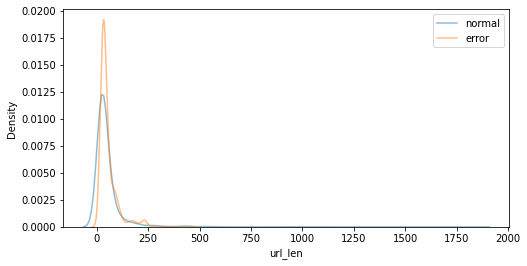

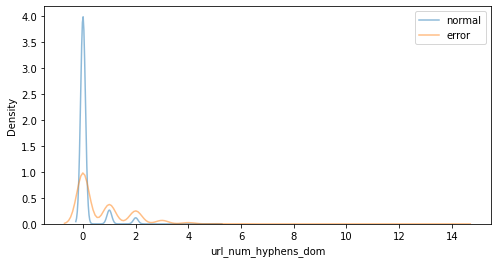

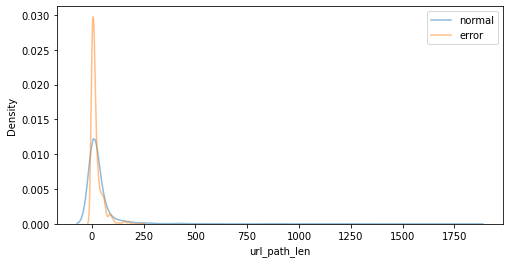

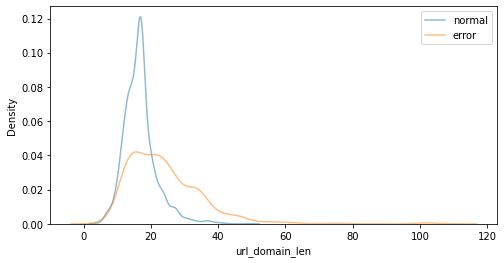

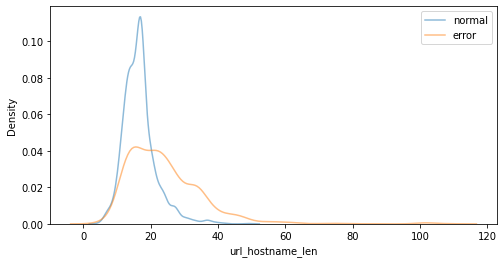

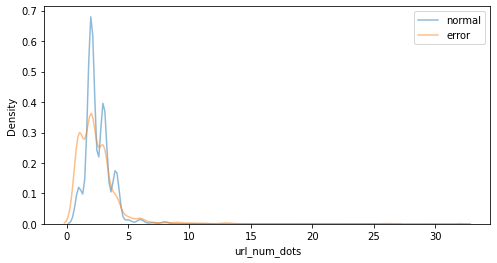

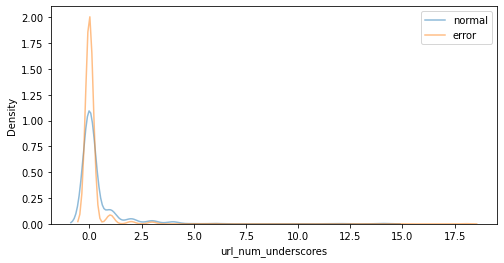

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


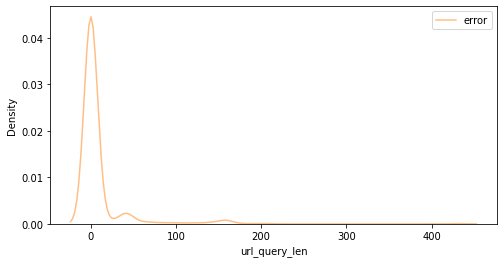

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


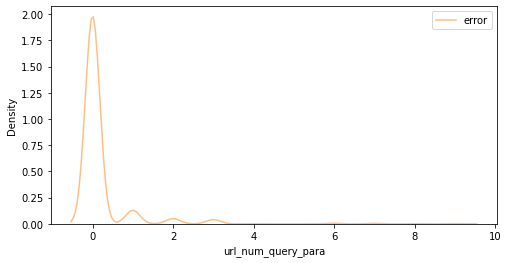

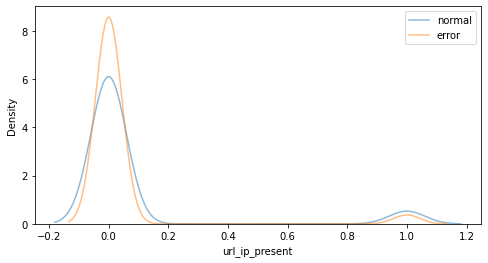

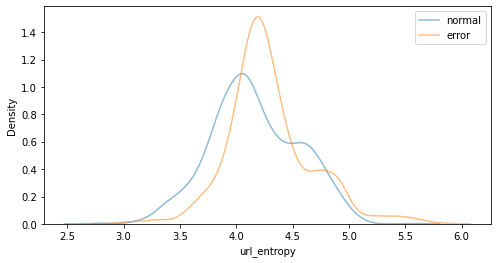

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


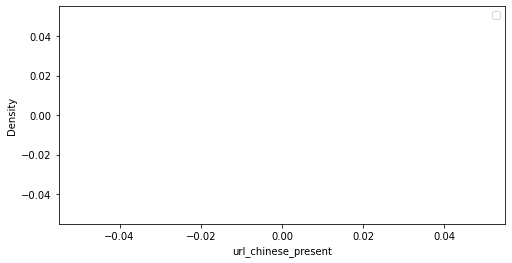

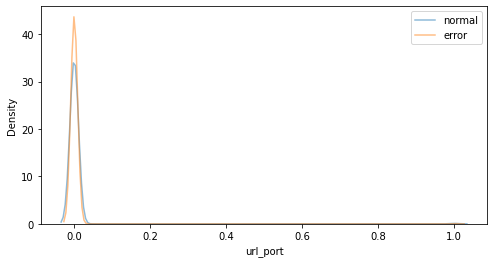

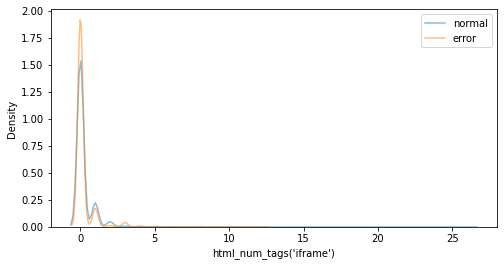

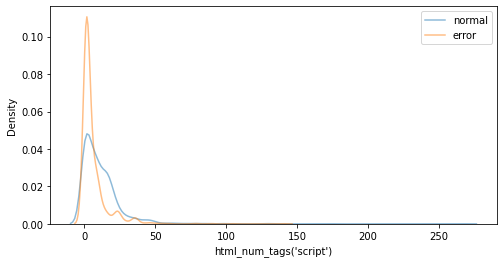

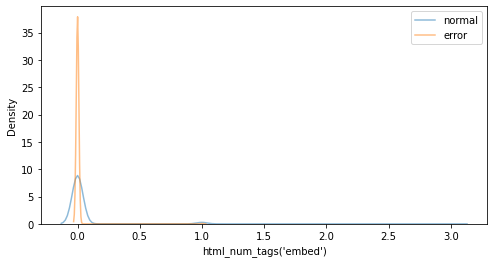

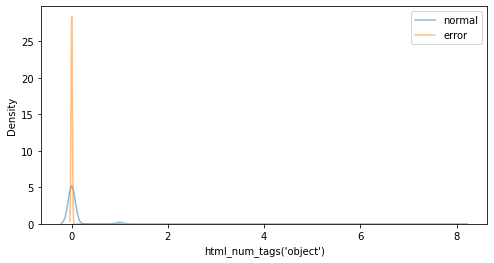

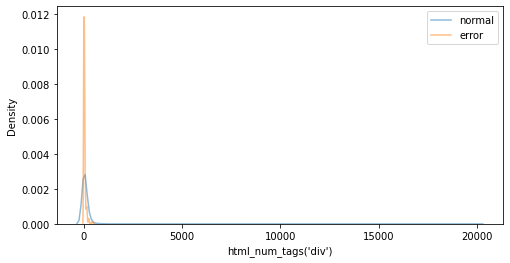

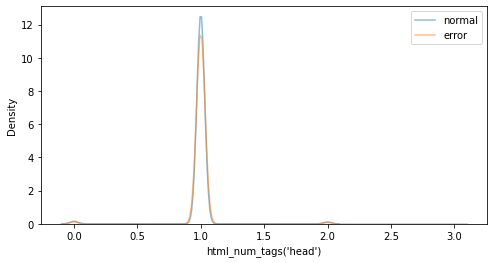

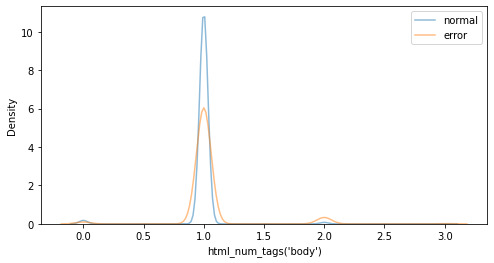

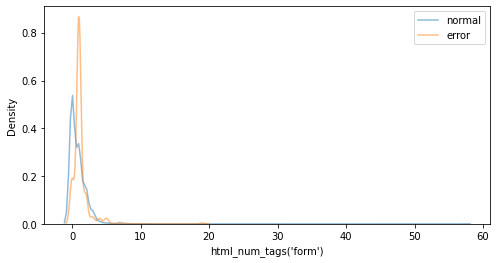

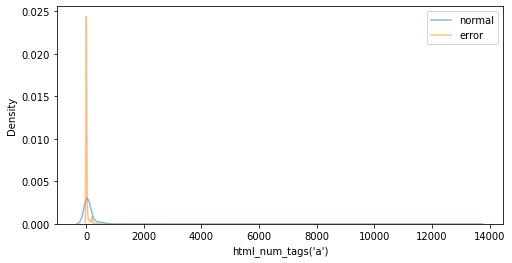

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


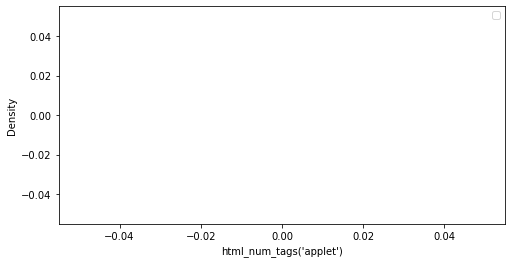

In [ ]:
def plot_(df, column):
  normal = df[df['label'] == 1][column]
  error = df[df['label'] == 0][column]
  plt.figure(figsize=(8,4))
  sns.kdeplot(normal, alpha=0.5, label='normal')
  sns.kdeplot(error, alpha=0.5, label='error')
  plt.legend(loc = 'upper right')
  plt.show()

for i, col in enumerate(train.columns):
  if col != 'label':
    plot_(train, col)

- url query len, url num query para는 에러만
- url chinese present, html_num_tags는 에러, 노말 둘다 존재 x (제거 고려)
- normal 과 error사이의 차이가 극명함

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

- target 데이터의 범주를 고려해 각 범주 값에 대한 상관분석은 가능
- 수치형 > 범주형인 데이터와의 관계를 파악하기 위해 p value진행

### 1) 전체 데이터 상관분석

<AxesSubplot:>

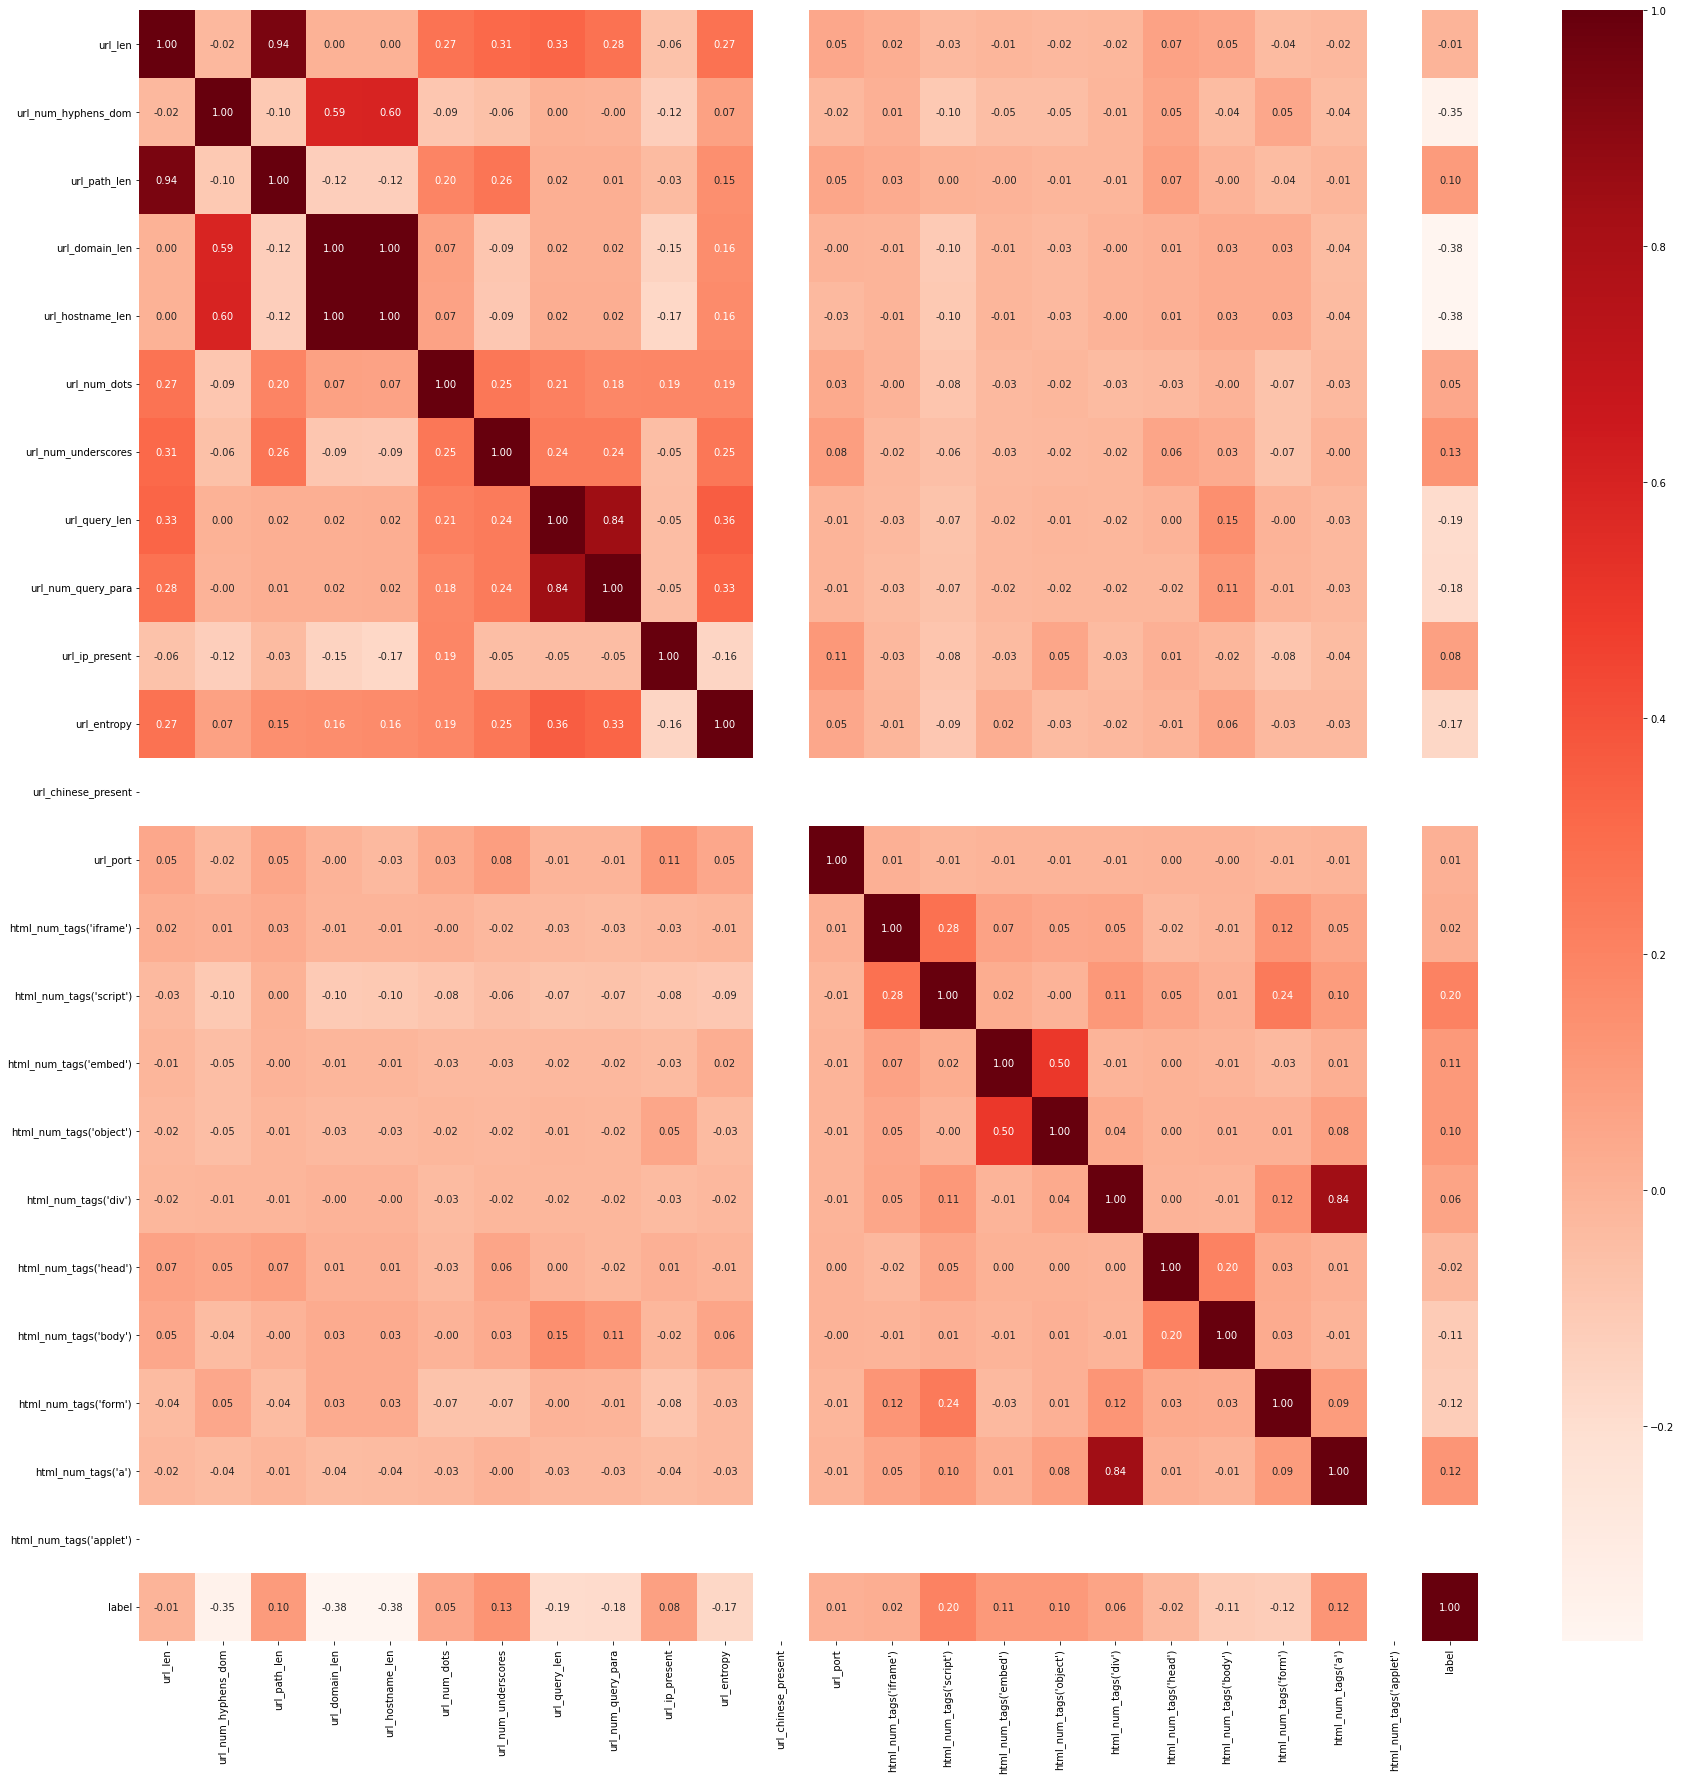

In [ ]:
# 전체 데이터 상관분석
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='Reds')

2) normal data 상관분석

<AxesSubplot:>

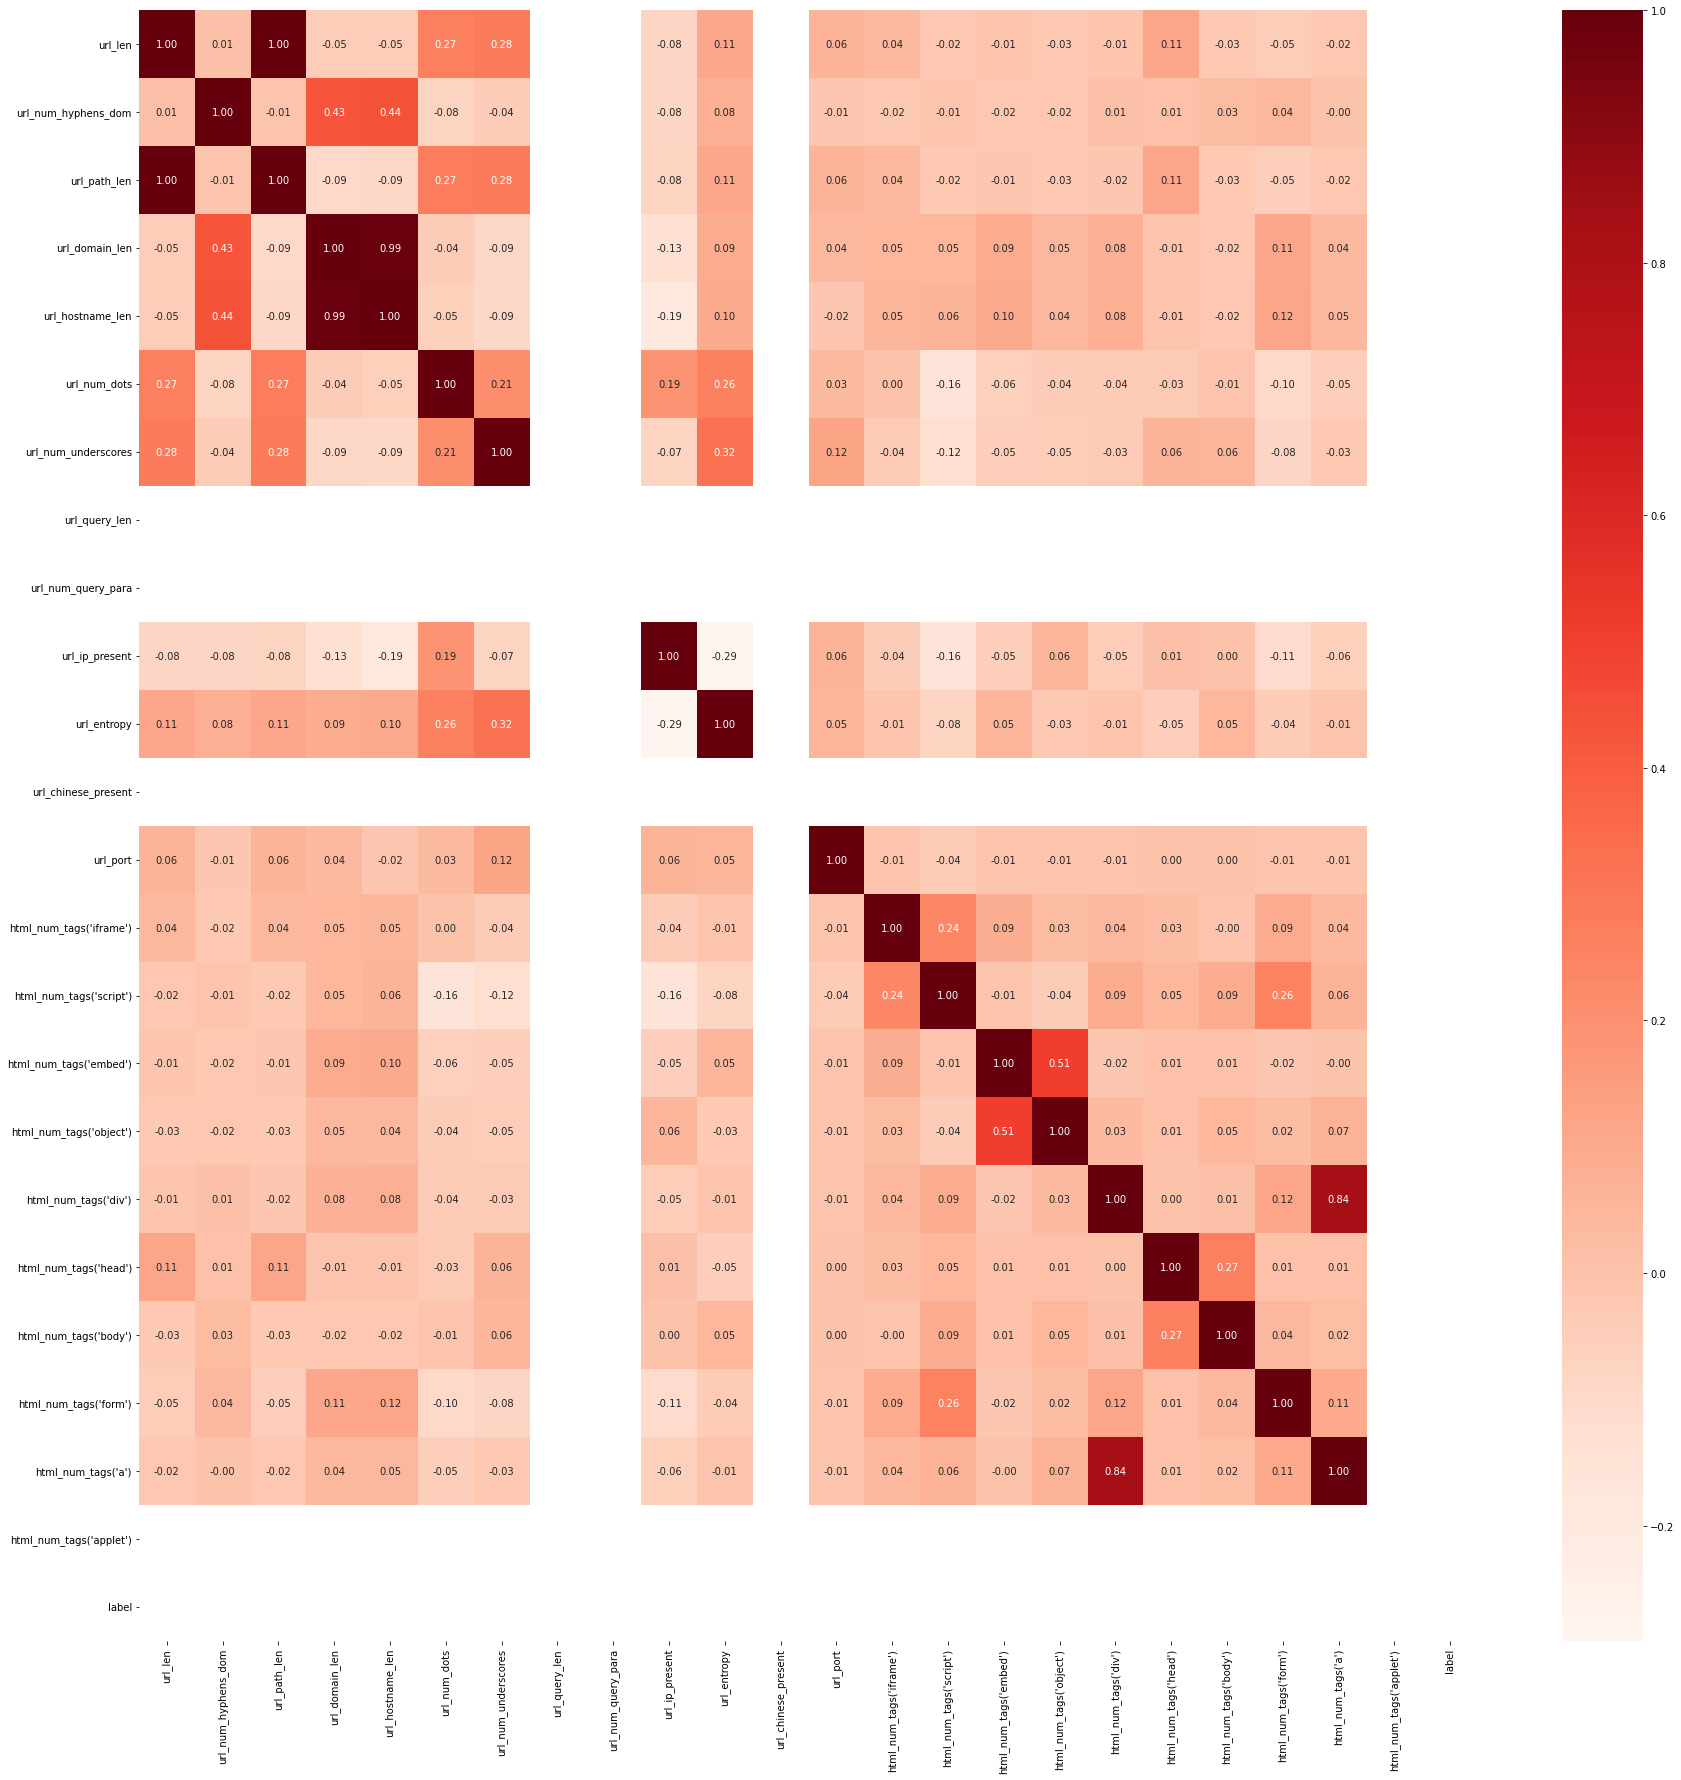

In [ ]:
# normal data값에 대한 상관분석
plt.figure(figsize=(30,30))
sns.heatmap(train[train['label']==1].corr(), annot=True, fmt='.2f', cmap='Reds')

### 3) error data 상관분석

<AxesSubplot:>

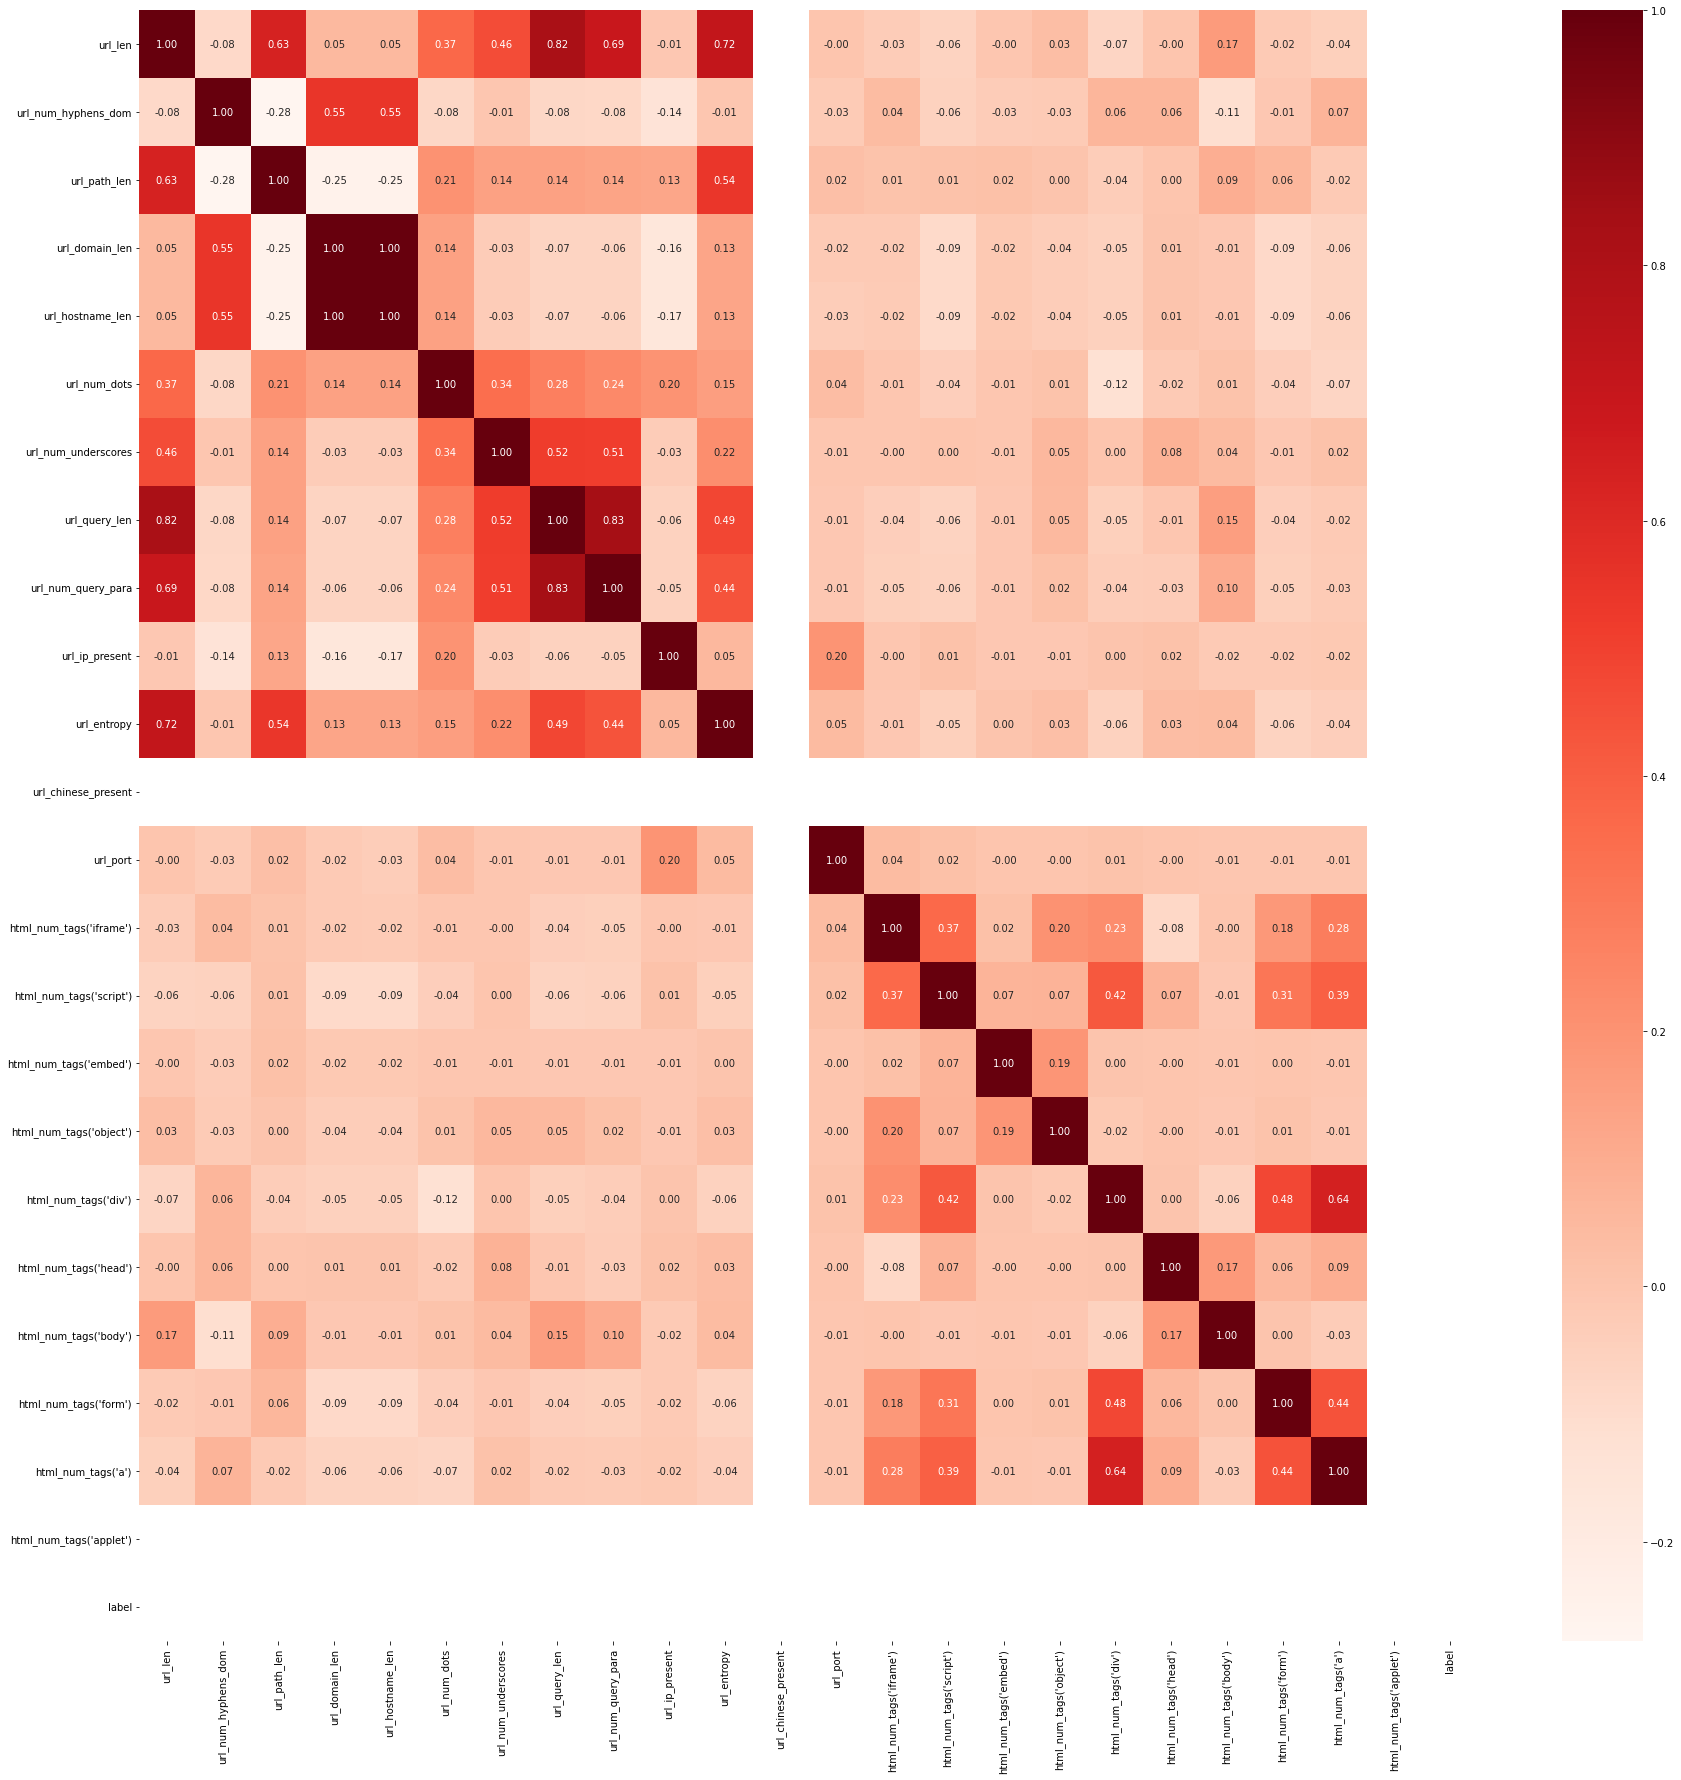

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train[train['label']==0].corr(), annot=True, fmt='.2f', cmap='Reds')

### 4) p-value

In [ ]:
# 범주형 데이터 삭제
col_l = []
for val in train.columns:
  col_l.append(val)
col_l.remove("label")
col_l.remove("url_chinese_present")
col_l.remove("html_num_tags('applet')")

#결측치 제거
data = train.dropna()

def logistic(columns):
  model = sm.Logit(data['label'], data[columns])
  result = model.fit()
  return result.pvalues

for i in col_l:
    print(i)
    print(logistic(i))
    print()

url_len
Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_len    0.932637
dtype: float64

url_num_hyphens_dom
Optimization terminated successfully.
         Current function value: 0.631764
         Iterations 6
url_num_hyphens_dom    1.208474e-61
dtype: float64

url_path_len
Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 5
url_path_len    4.907666e-09
dtype: float64

url_domain_len
Optimization terminated successfully.
         Current function value: 0.681897
         Iterations 4
url_domain_len    3.815200e-19
dtype: float64

url_hostname_len
Optimization terminated successfully.
         Current function value: 0.681520
         Iterations 4
url_hostname_len    1.028186e-19
dtype: float64

url_num_dots
Optimization terminated successfully.
         Current function value: 0.692513
         Iterations 3
url_num_dots    0.031656
dtype: float64

url_num_underscores
Optimization

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.649991
         Iterations: 35
url_query_len    0.999577
dtype: float64

url_num_query_para
         Current function value: 0.656616
         Iterations: 35
url_num_query_para    0.997772
dtype: float64

url_ip_present
Optimization terminated successfully.
         Current function value: 0.689900
         Iterations 4
url_ip_present    0.000002
dtype: float64

url_entropy
Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.915585
dtype: float64

url_port
Optimization terminated successfully.
         Current function value: 0.693078
         Iterations 4
url_port    0.484254
dtype: float64

html_num_tags('iframe')
Optimization terminated successfully.
         Current function value: 0.692840
         Iterations 4
html_num_tags('iframe')    0.146136
dtype: float64

html_num_tags('script')
Optimization terminated successfully.
         Current function value: 0.676166
         Iterati

- 영향이 없는 변수

[html_num_tags('body')
 , html_num_tags('head')
 , html_num_tags('iframe')
 , url_entropy
 , url_num_query_para
 , url_query_len, url_len 
 , url_port]

* 허나 이걸 바로 삭제 하는게 옳은 것일까?

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

In [ ]:
# 데이터 프레임의 info를 확인합니다.
train.info()

In [ ]:
# 중복 데이터 제거를 제거합니다.
train.duplicated().sum()

431

- 중복된 데이터가 있더라도 모델에 영향을 줄 수도 있으니 삭제 / 삭제x 로 구분지어야 함

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
# cae는 잠시 보류

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from itertools import product

import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from tqdm import notebook
import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install gauss-rank-scaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Config를 이용한 환경변수 설정 (모든 경우의 수 집합)
- unique에서 도출한 값을 1개만 가지는 feature를 포함할지?

- error에서만 분포를 가지는 feature를 포함할지?

- ( url query len, url num query para ) - 아래 기준과 중복
- p-value값으로 영향이 없는 column들도 포함을 할지?

- (url_entropy,  url_num_query_para,  url_query_len, url_len,  url_port, 
html_num_tags('body'), html_num_tags('head'), html_num_tags('iframe') )

- 전처리를 무엇으로 할지? (MINMAX, STANDARD, ROBUST, MAXABS)제외하고도 추가 고려 가능 ( tree모델이면 전처리 고려 x ) (기각)
- 전처리를 하고 쓰는 모델을 위해 min max랑 stanrd보다 성능이 좋은 gauss rank 일괄적으로 스케일링 진행, tree 모델은 스케일링의 영향을 안받기 때문에 상관 없음

- 중복된 값을 넣을지 말지?

- 결측치를 처리할지 말지? (결측치가 하나씩 컬럼 두개 만 있어서 보류) - drop하고 진행 

- (추가고려) 만약 점수가 낮으면 IterativeImputer통해서 결측치 채우기

- (추가고려) 전처리를 한다면 여러 모델을 고려해보아야함 SOTA모델 중 (KNN, CAE)(기각)

- 기본적인 model은 catboost와 lgbmr로 이용

In [ ]:
import numpy as np
from joblib import Parallel, delayed
from scipy.interpolate import interp1d
from scipy.special import erf, erfinv
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import FLOAT_DTYPES, check_array, check_is_fitted


class GaussRankScaler(BaseEstimator, TransformerMixin):

    def __init__(
        self,
        epsilon=1e-4,
        copy=True,
        n_jobs=None,
        interp_kind="linear",
        interp_copy=False,
    ):
        self.epsilon = epsilon
        self.copy = copy
        self.interp_kind = interp_kind
        self.interp_copy = interp_copy
        self.fill_value = "extrapolate"
        self.n_jobs = n_jobs
        self.bound = 1.0 - self.epsilon

    def fit(self, X, y=None):

        X = check_array(
            X, copy=self.copy, estimator=self, dtype=FLOAT_DTYPES, force_all_finite=True
        )

        self.interp_func_ = Parallel(n_jobs=self.n_jobs)(
            delayed(self._fit)(x) for x in X.T
        )
        return self

    def _fit(self, x):
        x = self.drop_duplicates(x)
        rank = np.argsort(np.argsort(x))
        factor = np.max(rank) / 2.0 * self.bound
        scaled_rank = np.clip(rank / factor - self.bound, -self.bound, self.bound)
        return interp1d(
            x,
            scaled_rank,
            kind=self.interp_kind,
            copy=self.interp_copy,
            fill_value=self.fill_value,
        )

    def transform(self, X, copy=None):

        check_is_fitted(self, "interp_func_")

        copy = copy if copy is not None else self.copy
        X = check_array(
            X, copy=copy, estimator=self, dtype=FLOAT_DTYPES, force_all_finite=True
        )

        X = np.array(
            Parallel(n_jobs=self.n_jobs)(
                delayed(self._transform)(i, x) for i, x in enumerate(X.T)
            )
        ).T
        return X

    def _transform(self, i, x):
        clipped = np.clip(self.interp_func_[i](x), -self.bound, self.bound)
        return erfinv(clipped)

    def inverse_transform(self, X, copy=None):
        check_is_fitted(self, "interp_func_")

        copy = copy if copy is not None else self.copy
        X = check_array(
            X, copy=copy, estimator=self, dtype=FLOAT_DTYPES, force_all_finite=True
        )

        X = np.array(
            Parallel(n_jobs=self.n_jobs)(
                delayed(self._inverse_transform)(i, x) for i, x in enumerate(X.T)
            )
        ).T
        return X

    def _inverse_transform(self, i, x):
        inv_interp_func = interp1d(
            self.interp_func_[i].y,
            self.interp_func_[i].x,
            kind=self.interp_kind,
            copy=self.interp_copy,
            fill_value=self.fill_value,
        )
        return inv_interp_func(erf(x))

    @staticmethod
    def drop_duplicates(x):
        is_unique = np.zeros_like(x, dtype=bool)
        is_unique[np.unique(x, return_index=True)[1]] = True
        return x[is_unique]

In [ ]:
train = train.dropna(axis=0)

In [ ]:
train.shape

(3662, 24)

In [ ]:
one_column_select = [True,False] #unique에서 하나의 값만 가치는 피쳐 포함?
one_distribute_select = [True,False] # error에서만 분포를 가지는 column을 적용할지
drop_duplicate_select = [True,False] # 중복된 값 제거할 지 말지
url_len_select = [True,False] #url_len 피쳐를 선택할지
url_entropy_select = [True,False] #url_entropy 피쳐를 선택할지
url_port_select = [True,False] #url_port 피쳐를 선택할지
iframe_select = [True,False] #iframe 피쳐를 선택할지
head_select = [True,False] #head 피쳐를 선택할지
body_select = [True,False] #body 피쳐를 선택할지

In [ ]:
iter = list(product(one_column_select,url_len_select,url_entropy_select,url_port_select,
            iframe_select,head_select,body_select,one_distribute_select, drop_duplicate_select))

In [ ]:
# 전체 전처리를 gaussrankscaler로 진행
def select_dataset(data,config, test_size) :

    # 데이터의 인덱스 초기화
    data.reset_index(drop = True, inplace = True)

    # one_columns에 해당하는 칼럼 정의
    one_columns = ['url_chinese_present',"html_num_tags('applet')"]
    # one_distribute에 해당하는 칼럼 정의
    one_distribute = ['url_query_len','url_num_query_para']
    # 모든 칼럼에서 경우의 수에 따라서 필요 없는 칼럼을 제거해 나갈 것이다.
    all_columns = list(data.columns)
    # one_columns에 해당하는 칼럼을 제거할 것인가?
    if config['one_column_on'] == False :
        for i in one_columns :
            all_columns.remove(i)
    # url_len을 분석에 적용할 것인가?    
    if config['url_len_off'] == False :
        all_columns.remove('url_len')
    # url_entropy를 분석에 적용할 것인가?
    if config['url_entropy_off'] == False :
        all_columns.remove('url_entropy')
    # url_port를 분석에 적용할 것인가?
    if config['url_port_off'] == False :
        all_columns.remove('url_port')
    # iframe을 분석에 적용할 것인가?
    if config['iframe_off'] == False :
        all_columns.remove("html_num_tags('iframe')")
    # head를 분석에 적용할 것인가?
    if config['head_off'] == False :
        all_columns.remove("html_num_tags('head')")
    # body를 분석에 적용할 것인가?
    if config['body_off'] == False :
        all_columns.remove("html_num_tags('body')")
    # one_distribute에 해당하는 칼럼을 분석에 적용할 것인가?
    if config['one_distribute_on'] == False :
        for i in one_distribute :
            all_columns.remove(i)

    # 중복된 데이터를 제거할 것인가?
    if config['drop_duplicate'] == True :
        data.drop_duplicates(inplace = True)
        data.reset_index(drop = True, inplace = True)

    # 경우의 수에 따라 정제된 칼럼을 정의함
    data = data[all_columns]

    # train test split
    train, test = train_test_split(data, test_size = test_size, random_state = 42,shuffle=True)
    train.reset_index(drop = True, inplace = True)
    test.reset_index(drop = True, inplace = True)


    
    train_x = train.drop(columns = ["label"])
    train_y = train["label"]
    test_x = test.drop(columns = ["label"])
    test_y = test["label"]

    return train_x, train_y, test_x, test_y
    



### 1) TREE모델 기준

#### 1) Catboost모델을 적용해 각 경우의 수 점수 도출

In [ ]:
def iter_config1(one_column,url_len,url_entropy,url_port,iframe,head,body,one_distribute,drop_duplicate) :
    # config 딕셔너리 만들기
    config = dict()
    config['one_column_on'] = one_column
    config['url_len_off'] = url_len
    config['url_entropy_off'] = url_entropy
    config['url_port_off'] = url_port
    config['iframe_off'] = iframe
    config['head_off'] = head
    config['body_off'] = body
    config['one_distribute_on'] = one_distribute
    config['drop_duplicate'] = drop_duplicate

    # 환경에 따른 데이터 셋 불러오기
    train_x, train_y, test_x, test_y  = select_dataset(train,config)
    # catboost 모델 학습 및 예측
    model = CatBoostClassifier(random_state = 42, verbose = 0)
    model.fit(train_x, train_y)
    predict_y = model.predict(test_x)
    # f1 score로 평가
    f1 = metrics.f1_score(test_y, predict_y)
    return f1

In [ ]:
result = []
for i in notebook.tqdm(iter) :
    time.sleep(0.01)
    output = iter_config1(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8])
    result.append(output)
    print(i,output)

  0%|          | 0/512 [00:00<?, ?it/s]

(True, True, True, True, True, True, True, True, True) 0.9539877300613496
(True, True, True, True, True, True, True, True, False) 0.9539877300613496
(True, True, True, True, True, True, True, False, True) 0.9467275494672756
(True, True, True, True, True, True, True, False, False) 0.9467275494672756
(True, True, True, True, True, True, False, True, True) 0.9542682926829268
(True, True, True, True, True, True, False, True, False) 0.9542682926829268
(True, True, True, True, True, True, False, False, True) 0.9451219512195123
(True, True, True, True, True, True, False, False, False) 0.9451219512195123
(True, True, True, True, True, False, True, True, True) 0.9555895865237366
(True, True, True, True, True, False, True, True, False) 0.9555895865237366
(True, True, True, True, True, False, True, False, True) 0.9465648854961832
(True, True, True, True, True, False, True, False, False) 0.9465648854961832
(True, True, True, True, True, False, False, True, True) 0.9539877300613496
(True, True, Tru

In [ ]:
# 데이터 프레임 생성 및 값 넣기
final_catboost = pd.DataFrame()
final_catboost["iter"] = iter
final_catboost["f1"] = result
# 스코어가 높은 순서대로 sorting하기 & csv 파일 형태로 저장
final_catboost.sort_values(by = "f1", ascending = False).to_csv("result_catboost.csv")

In [ ]:
pd.set_option('display.max_colwidth', -1)
final_catboost.sort_values(by='f1', ascending=False).head()

,iter,f1
288,"(False, True, True, False, True, True, True, True, True)",0.960000
289,"(False, True, True, False, True, True, True, True, False)",0.960000
33,"(True, True, True, False, True, True, True, True, False)",0.960000
32,"(True, True, True, False, True, True, True, True, True)",0.960000
28,"(True, True, True, True, False, False, False, True, True)",0.958652


#### 2) LGBM모델을 적용해 각 경우의 수 점수 도출
- 수치형 변수들에 좋은 학습효과

In [ ]:
def iter_config2(one_column,url_len,url_entropy,url_port,iframe,head,body,one_distribute,drop_duplicate) :
    # config 딕셔너리 만들기
    config = dict()
    config['one_column_on'] = one_column
    config['url_len_off'] = url_len
    config['url_entropy_off'] = url_entropy
    config['url_port_off'] = url_port
    config['iframe_off'] = iframe
    config['head_off'] = head
    config['body_off'] = body
    config['one_distribute_on'] = one_distribute
    config['drop_duplicate'] = drop_duplicate

    # 환경에 따른 데이터 셋 불러오기
    train_x, train_y, test_x, test_y = select_dataset(train,config, 0.2)
    # lgbm 모델 학습 및 예측
    model = LGBMClassifier(random_state = 42)
    model.fit(train_x, train_y)
    predict_y = model.predict(test_x)
    # f1 score로 평가
    f1 = metrics.f1_score(test_y, predict_y)
    return f1

In [ ]:
result = []
for i in notebook.tqdm(iter) :
    time.sleep(0.01)
    output = iter_config2(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8])
    result.append(output)
    print(i,output)

  0%|          | 0/512 [00:00<?, ?it/s]

(True, True, True, True, True, True, True, True, True) 0.9554531490015361
(True, True, True, True, True, True, True, True, False) 0.9554531490015361
(True, True, True, True, True, True, True, False, True) 0.9523809523809526
(True, True, True, True, True, True, True, False, False) 0.9523809523809526
(True, True, True, True, True, True, False, True, True) 0.9537037037037037
(True, True, True, True, True, True, False, True, False) 0.9537037037037037
(True, True, True, True, True, True, False, False, True) 0.9541284403669725
(True, True, True, True, True, True, False, False, False) 0.9541284403669725
(True, True, True, True, True, False, True, True, True) 0.9554531490015361
(True, True, True, True, True, False, True, True, False) 0.9554531490015361
(True, True, True, True, True, False, True, False, True) 0.9541284403669725
(True, True, True, True, True, False, True, False, False) 0.9541284403669725
(True, True, True, True, True, False, False, True, True) 0.9553158705701078
(True, True, Tru

In [ ]:
# 데이터 프레임 생성 및 값 넣기
final_lgbmc = pd.DataFrame()
final_lgbmc["iter"] = iter
final_lgbmc["f1"] = result
# 스코어가c높은 순서대로 sorting하기 & csv 파일 형태로 저장
final_lgbmc.sort_values(by = "f1", ascending = False).to_csv("result_lgbmc.csv")

In [ ]:
pd.set_option('display.max_colwidth', -1)
final_lgbmc.sort_values(by='f1', ascending=False).head()

,iter,f1
317,"(False, True, True, False, False, False, False, True, False)",0.959752
28,"(True, True, True, True, False, False, False, True, True)",0.959752
29,"(True, True, True, True, False, False, False, True, False)",0.959752
285,"(False, True, True, True, False, False, False, True, False)",0.959752
284,"(False, True, True, True, False, False, False, True, True)",0.959752
